## Arya Chakraborty 22MSD7020
## Date : 3/16/23

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.columns,df.shape

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 (891, 12))

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop("Cabin",axis=1,inplace=True)
df.dropna(inplace=True)

In [7]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [9]:
x=df[['Pclass','Sex','Age']]
y=df['Survived']

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
model=DecisionTreeClassifier(max_depth=3,criterion='entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

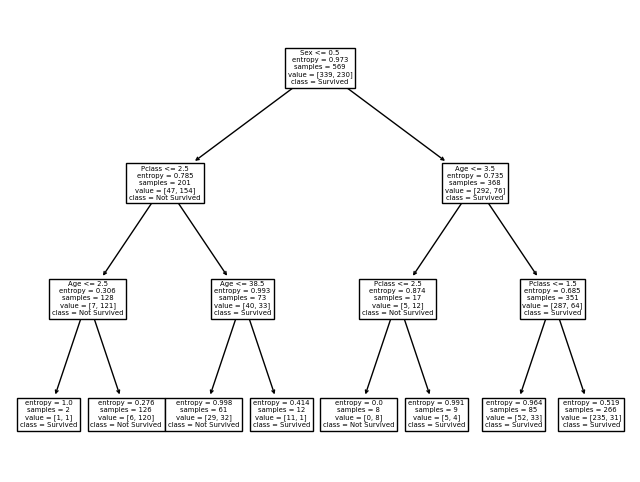

In [12]:
fig=plt.figure(figsize=(8,6))
tree.plot_tree(model,feature_names=['Pclass','Sex','Age'],class_names=['Survived','Not Survived'])
plt.show()

In [13]:
model.score(x_test,y_test)

0.7692307692307693

In [14]:
def future_prediction(sample):
    predict=model.predict(sample)
    if predict==0:
        print("survived")
    else:
        print("Didn't survive")

future_prediction([[3,1,22.0]])
future_prediction([[1,0,38.0]])

survived
Didn't survive


c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3)
clf.fit(x_train,y_train)

y_pred2 = clf.predict(x_test)

In [16]:
from sklearn import metrics
print("Accuracy:",model.score(x_test,y_test))

Accuracy: 0.7692307692307693


In [17]:
def future_pred(sample):
    prediction=clf.predict(sample)
    if prediction==0:
        print("survived")
    else:
        print("Didn't survive")

future_pred([[3,1,22.0]])
future_pred([[1,0,38.0]])

survived
Didn't survive


c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\chakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
from scipy.stats import randint

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [19]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, rs_space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=3)
model_random = rf_random.fit(x_train,y_train)

In [20]:
final_score=model_random.score(x_test,y_test)
final_score

0.7762237762237763

In [21]:
print('Best hyperparameters are: '+str(model_random.best_params_))
print('Best score is: ',final_score)

Best hyperparameters are: {'criterion': 'entropy', 'max_depth': 80, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 410}
Best score is:  0.7762237762237763


## Using "Random Search CV" we can say that the best hyperparameters for Random Forest Classifier is  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 10}

## AND the Score is 80.4%